In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # to change styles
import matplotlib.style as style

#import magic line to show graphs in jupyter notebook
%matplotlib inline

#need to clean episode 0 that is showing up... 

In [ ]:
#try to do mapping to clean up the names of the series into something more managable

In [9]:
#formating for seaborn
style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

In [10]:
style.use('seaborn')

In [2]:
df = pd.read_csv('atla+lok+tdp.csv',index_col = 0)

In [3]:
df.head()

,title,episode of,season,episode,rating,votes,original air date,year,plot
0,The Boy in the Iceberg,Avatar: The Last Airbender,1,1,8.101235,2011,2005-02-21,2005,\n The legend of the Avatar is told. Katara...
1,The Avatar Returns,Avatar: The Last Airbender,1,2,8.401235,1760,2005-02-21,2005,\n Aang and Katara inadvertently set off a ...
2,The Southern Air Temple,Avatar: The Last Airbender,1,3,8.501235,1681,2005-02-25,2005,\n After his departure from the Southern Ai...
3,The Warriors of Kyoshi,Avatar: The Last Airbender,1,4,8.201235,1625,2005-03-04,2005,\n The gang arrives at Kyoshi Island and ar...
4,The King of Omashu,Avatar: The Last Airbender,1,5,8.201235,1640,2005-03-18,2005,\n Aang's abilities as an airbender are cha...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 131
Data columns (total 9 columns):
title                132 non-null object
episode of           132 non-null object
season               132 non-null int64
episode              132 non-null int64
rating               132 non-null float64
votes                132 non-null int64
original air date    132 non-null object
year                 132 non-null int64
plot                 132 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 10.3+ KB


In [8]:
# Average Rating by TV Show
df.groupby('episode of')['rating'].mean().sort_values(ascending = False)

episode of
Avatar: The Last Airbender    8.680267
The Legend of Korra           8.658927
The Dragon Prince             8.329012
Name: rating, dtype: float64

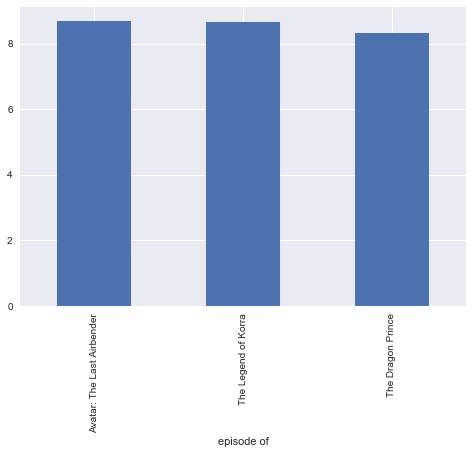

In [11]:
# Average Rating by TV Show
df.groupby('episode of')['rating'].mean().sort_values(ascending = False).plot(kind = 'bar')

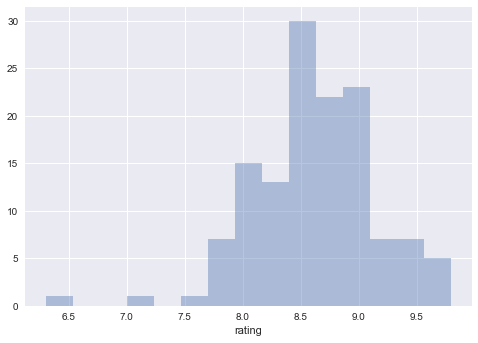

In [13]:
#histogram by overall data
sns.distplot(df['rating'],kde = False)

In [14]:
#what are those two poorly performing episodes?
df[df['rating']<7.5]

#comes from ATLA and LOK, not TDP

,title,episode of,season,episode,rating,votes,original air date,year,plot
10,The Great Divide,Avatar: The Last Airbender,1,11,7.201235,1585,2005-05-20,2005,\n Aang is tested as the Avatar when he mus...
108,Remembrances,The Legend of Korra,4,8,6.301235,855,2014-11-21,2014,"\n Wu begins his exile with Mako's family, ..."


episode of
Avatar: The Last Airbender    AxesSubplot(0.125,0.125;0.775x0.755)
The Dragon Prince             AxesSubplot(0.125,0.125;0.775x0.755)
The Legend of Korra           AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

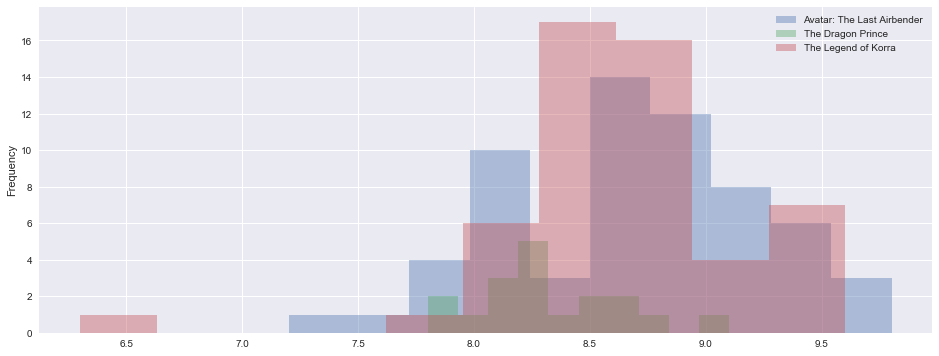

In [18]:
#how does histogram look by show?
plt.figure(figsize = (16,6))
df.groupby('episode of')['rating'].plot(kind = 'hist', alpha = .4, legend = True)

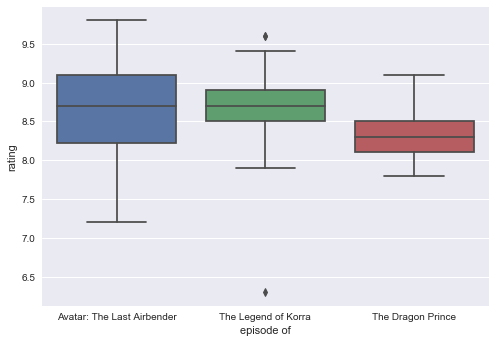

In [19]:
#explore how this looks as a box & whisker
sns.boxplot(x ='episode of',y='rating',data = df)
#Avatar with the most seasons has the widest episode deviation
#Lok has 2 outliers, both from a good and bad perspective
#TDP stays relatively within 8 and 8.5

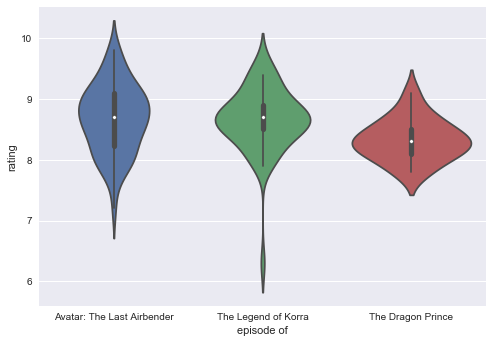

In [22]:
#Kinda like this better.  
sns.violinplot(x = 'episode of', y = 'rating', data = df)

In [46]:
df.groupby(['episode of','season'])['rating'].describe().sort_values(by = 'mean', ascending = False)
#confirmed observations
#TDP has the lowest standard deviation

count      mean       std       min  \
episode of                 season                                        
Avatar: The Last Airbender 3        21.0  8.905996  0.521034  7.801235   
The Legend of Korra        3        13.0  8.824311  0.394026  8.301235   
Avatar: The Last Airbender 2        20.0  8.726235  0.466651  7.601235   
The Legend of Korra        4        13.0  8.693542  0.765356  6.301235   
                           1        12.0  8.676235  0.295804  8.101235   
                           2        14.0  8.458377  0.516965  7.901235   
The Dragon Prince          2         9.0  8.423457  0.363242  7.801235   
Avatar: The Last Airbender 1        21.0  8.410758  0.586434  7.201235   
The Dragon Prince          1         9.0  8.234568  0.300000  7.801235   

                                        25%       50%       75%       max  
episode of                 season                                          
Avatar: The Last Airbender 3       8.701235  8.901235  9.201235  9.801235  
The Legend of Korra        3       8.601235  8.701235  9.001235  9.601235  
Avatar: The Last Airbender 2       8.501235  8.801235  9.001235  9.501235  
The Legend of Korra        4       8.701235  8.801235  9.101235  9.301235  
                           1       8.501235  8.701235  8.901235  9.201235  
                           2       8.026235  8.401235  8.651235  9.601235  
The Dragon Prince          2       8.301235  8.301235  8.601235  9.101235  
Avatar: The Last Airbender 1       8.001235  8.201235  8.601235  9.801235  
The Dragon Prince          1       8.101235  8.101235  8.401235  8.801235

In [47]:
df.groupby(['episode of','season'])['rating'].mean()

episode of                  season
Avatar: The Last Airbender  1         8.410758
                            2         8.726235
                            3         8.905996
The Dragon Prince           1         8.234568
                            2         8.423457
The Legend of Korra         1         8.676235
                            2         8.458377
                            3         8.824311
                            4         8.693542
Name: rating, dtype: float64

In [54]:
df.groupby(['episode of','season','episode'])['rating'].head()

0      8.101235
1      8.401235
2      8.501235
3      8.201235
4      8.201235
         ...   
127    8.301235
128    8.701235
129    8.501235
130    8.601235
131    9.101235
Name: rating, Length: 132, dtype: float64

In [64]:
df2 = df[['episode of','season','episode','rating']].pivot_table(index = ['episode of','season','episode']).copy()

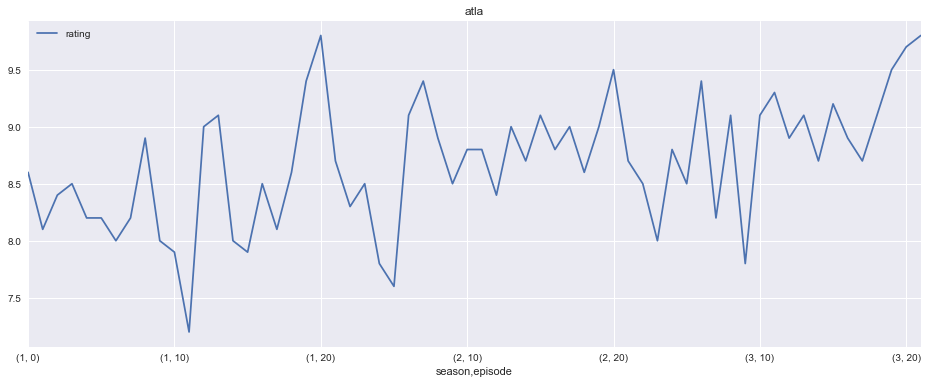

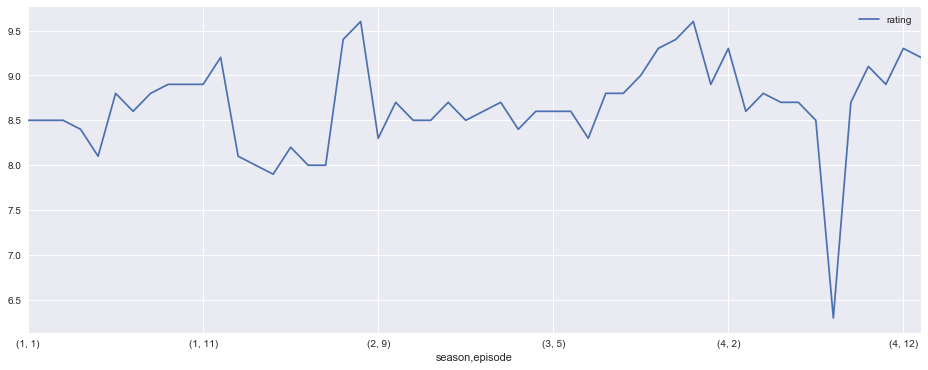

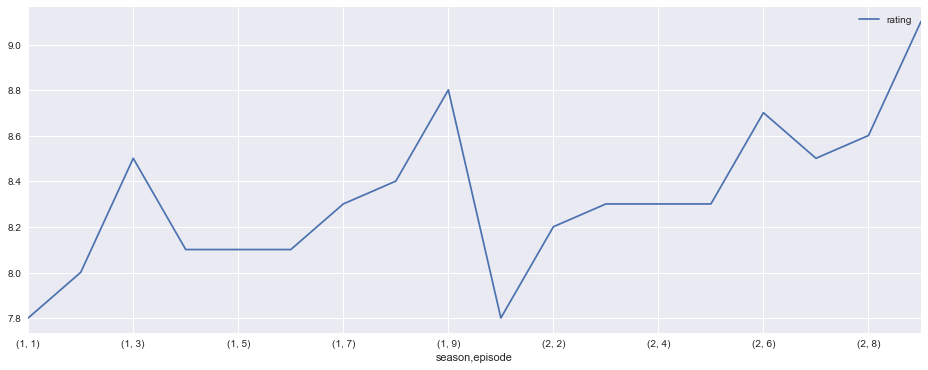

In [124]:
# I did it! Wonder how it woudl look relative to creating a new column with s1-ep1 
# need to make this a bigger and wider... 
#plt.figure(figsize = (16,6))
df2.loc['Avatar: The Last Airbender'].plot(figsize = (16,6), title = 'atla')
df2.loc['The Legend of Korra'].plot(figsize = (16,6))
df2.loc['The Dragon Prince'].plot(figsize = (16,6))

In [114]:
df2[df2['episode of']== 'Avatar: The Last Airbender']

KeyError: 'episode of'

In [112]:
#print(df['plot'][df['episode'] == 0])

33    \n    Sokka and his sister Kya - later renamed...
Name: plot, dtype: object


[]

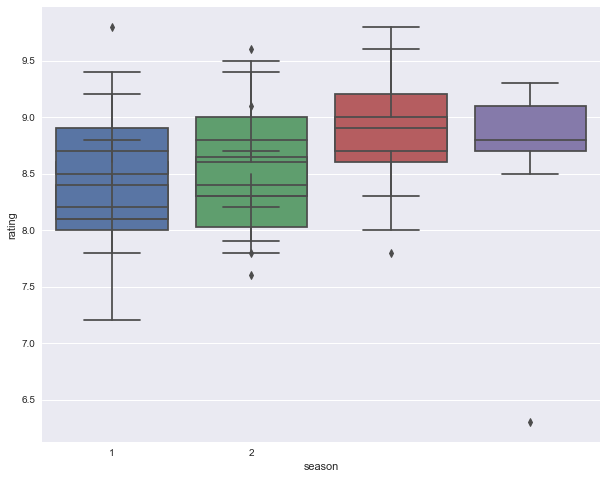

In [79]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'Avatar: The Last Airbender'],ax=ax1)
ax = sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'The Legend of Korra'],ax=ax2)
ax = sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'The Dragon Prince'],ax=ax3)

plt.plot()

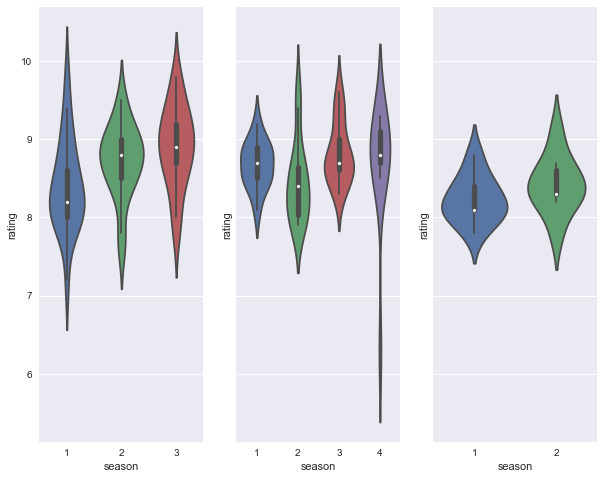

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,8), sharey = True)

sns.violinplot(x ='season',y='rating',data = df[df['episode of']== 'Avatar: The Last Airbender'],ax=ax1)
sns.violinplot(x ='season',y='rating',data = df[df['episode of']== 'The Legend of Korra'],ax=ax2)
sns.violinplot(x ='season',y='rating',data = df[df['episode of']== 'The Dragon Prince'],ax=ax3)

In [96]:
show_titles = list(df['episode of'].unique())

In [97]:
print(show_titles)

['Avatar: The Last Airbender', 'The Legend of Korra', 'The Dragon Prince']


Text(0.5, 1.0, 'The Dragon Prince')

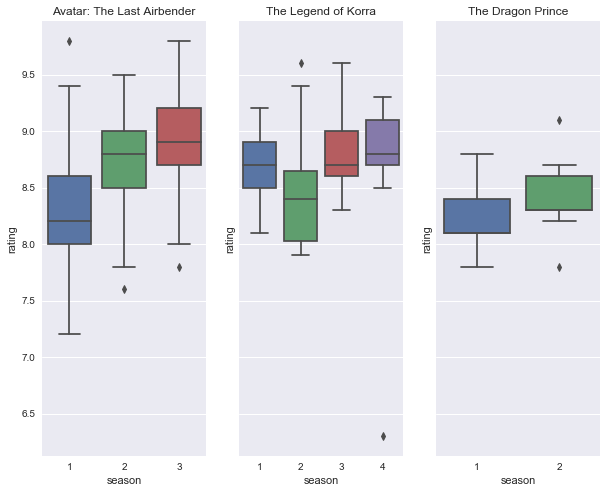

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,8), sharey = True)


sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'Avatar: The Last Airbender'],ax=ax1)
ax1.set_title(show_titles[0])

sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'The Legend of Korra'],ax=ax2)
ax2.set_title(show_titles[1])

sns.boxplot(x ='season',y='rating',data = df[df['episode of']== 'The Dragon Prince'],ax=ax3)
ax3.set_title(show_titles[2])

#need to learn a bit more about subplots & honestly - matplot lib.  Seems like seaborn does things quick. 
#but still need matplot lib to quickly add things like titles, hashmarks, etc. 

#quick tutorial to look at what I need

In [106]:
df[['season','episode','rating']][df['episode of']== 'Avatar: The Last Airbender']

,season,episode,rating
0,1,1,8.101235
1,1,2,8.401235
2,1,3,8.501235
3,1,4,8.201235
4,1,5,8.201235
5,1,6,8.001235
6,1,7,8.201235
7,1,8,8.901235
8,1,9,8.001235
9,1,10,7.901235


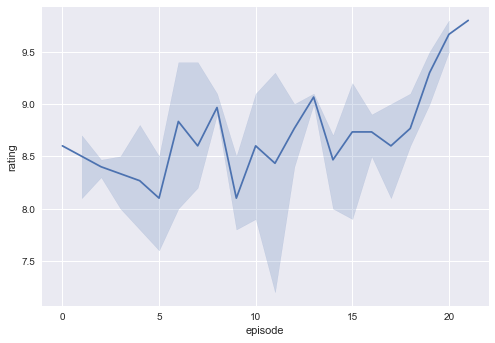

In [107]:
sns.lineplot(x='episode',y='rating',data = df[
    ['season','episode','rating']][df['episode of']== 'Avatar: The Last Airbender'])

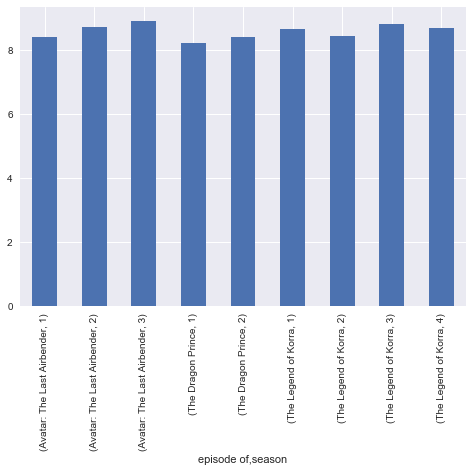

In [50]:
df.groupby(['episode of','season'])['rating'].mean().plot(kind = 'bar')

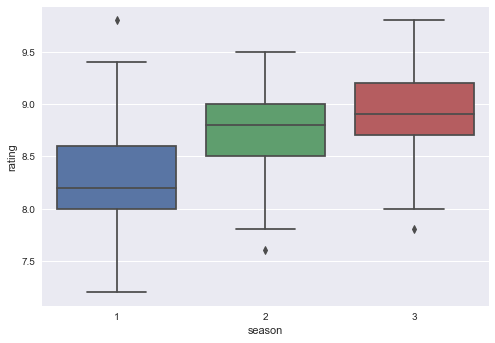

In [24]:
sns.boxplot(x = 'season',y='rating',data = df[df['episode of']== 'Avatar: The Last Airbender'])

In [36]:
df.rating.groupby(['episode of','season']).mean()

KeyError: 'episode of'

In [ ]:
sns.boxplot(x = 'season',y='rating', hue = 'episode of', data = df,dodge = True)

In [ ]:
#might be able to use category plots
sns.catplot(x='season',y='rating',col = 'episode of',data = df, kind = 'box')

In [ ]:
# some additional interesting trends
#ATLA got consistently better as it advanced the seasons
#Lok was a little more mixed

In [ ]:
df[df['episode of'] == 'The Legend of Korra'].groupby('season')['rating'].describe().sort_values(
    by = 'season', ascending = True)

In [ ]:
df[df['season']==0]
#There is no season 0, so why is it plotting it?

In [ ]:
plt.figure(figsize = (16,6))
style.use('fivethirtyeight')

sns.lineplot(x = 'episode',y='rating', 
             hue = 'season',
             data = df[df['episode of'] == 'Avatar: The Last Airbender']
            )

In [ ]:
plt.figure(figsize = (16,6))
style.use('fivethirtyeight')

sns.lineplot(x = 'episode',y='rating', 
             hue = 'season',
             data = df[df['episode of'] == 'Avatar: The Last Airbender']
            )

In [ ]:
df['season'].unique()

In [ ]:
df[df['episode of']== 'Avatar: The Last Airbender']